# Exercise 1: Classification
## Dataset: Breast Cancer

### Import libriaries

In [380]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time

In [381]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)

import platform
print(platform.system()) 
print(platform.version())

import sys
print(sys.version)


pandas version: 2.1.4
numpy version: 1.26.4
matplotlib version: 3.8.0
seaborn version: 0.13.2
scikit-learn version: 1.2.2
Darwin
Darwin Kernel Version 22.1.0: Sun Oct  9 20:14:30 PDT 2022; root:xnu-8792.41.9~2/RELEASE_ARM64_T8103
3.11.7 (main, Dec 15 2023, 12:09:04) [Clang 14.0.6 ]


### Load data

In [382]:
df_train = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv', sep=',')
df_test = pd.read_csv('breast-cancer-diagnostic.shuf.tes.csv', sep = ',')
df_solution = pd.read_csv('breast-cancer-diagnostic.shuf.sol.ex.csv', sep = ',')

In [383]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [384]:
df_train

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,911150,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,857156,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,8910251,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,8910499,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [385]:
df_test

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,8813129,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,881094802,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,88350402,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,9010598,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,862485,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,8910506,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,8812877,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [386]:
df_solution

,ID,class
0,9012568,False
1,844981,False
2,8813129,False
3,881094802,False
4,88350402,False
...,...,...
279,9010598,False
280,862485,False
281,8910506,False
282,8812877,False


In [387]:
true_false_counts = df_solution['class'].value_counts()
print(true_false_counts)

class
False    284
Name: count, dtype: int64


### Basic data exploration

In [388]:
df_train.info() # all attributes are numerical with float64 datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      285 non-null    int64  
 1   class                   285 non-null    bool   
 2   radiusMean              285 non-null    float64
 3   textureMean             285 non-null    float64
 4   perimeterMean           285 non-null    float64
 5   areaMean                285 non-null    float64
 6   smoothnessMean          285 non-null    float64
 7   compactnessMean         285 non-null    float64
 8   concavityMean           285 non-null    float64
 9   concavePointsMean       285 non-null    float64
 10  symmetryMean            285 non-null    float64
 11  fractalDimensionMean    285 non-null    float64
 12  radiusStdErr            285 non-null    float64
 13  textureStdErr           285 non-null    float64
 14  perimeterStdErr         285 non-null    fl

### Checking for missing values

In [389]:
df_train.isnull().sum() # there are no missing values

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
fractalDimensionWorst     0
dtype: int64

### Checking for outliers

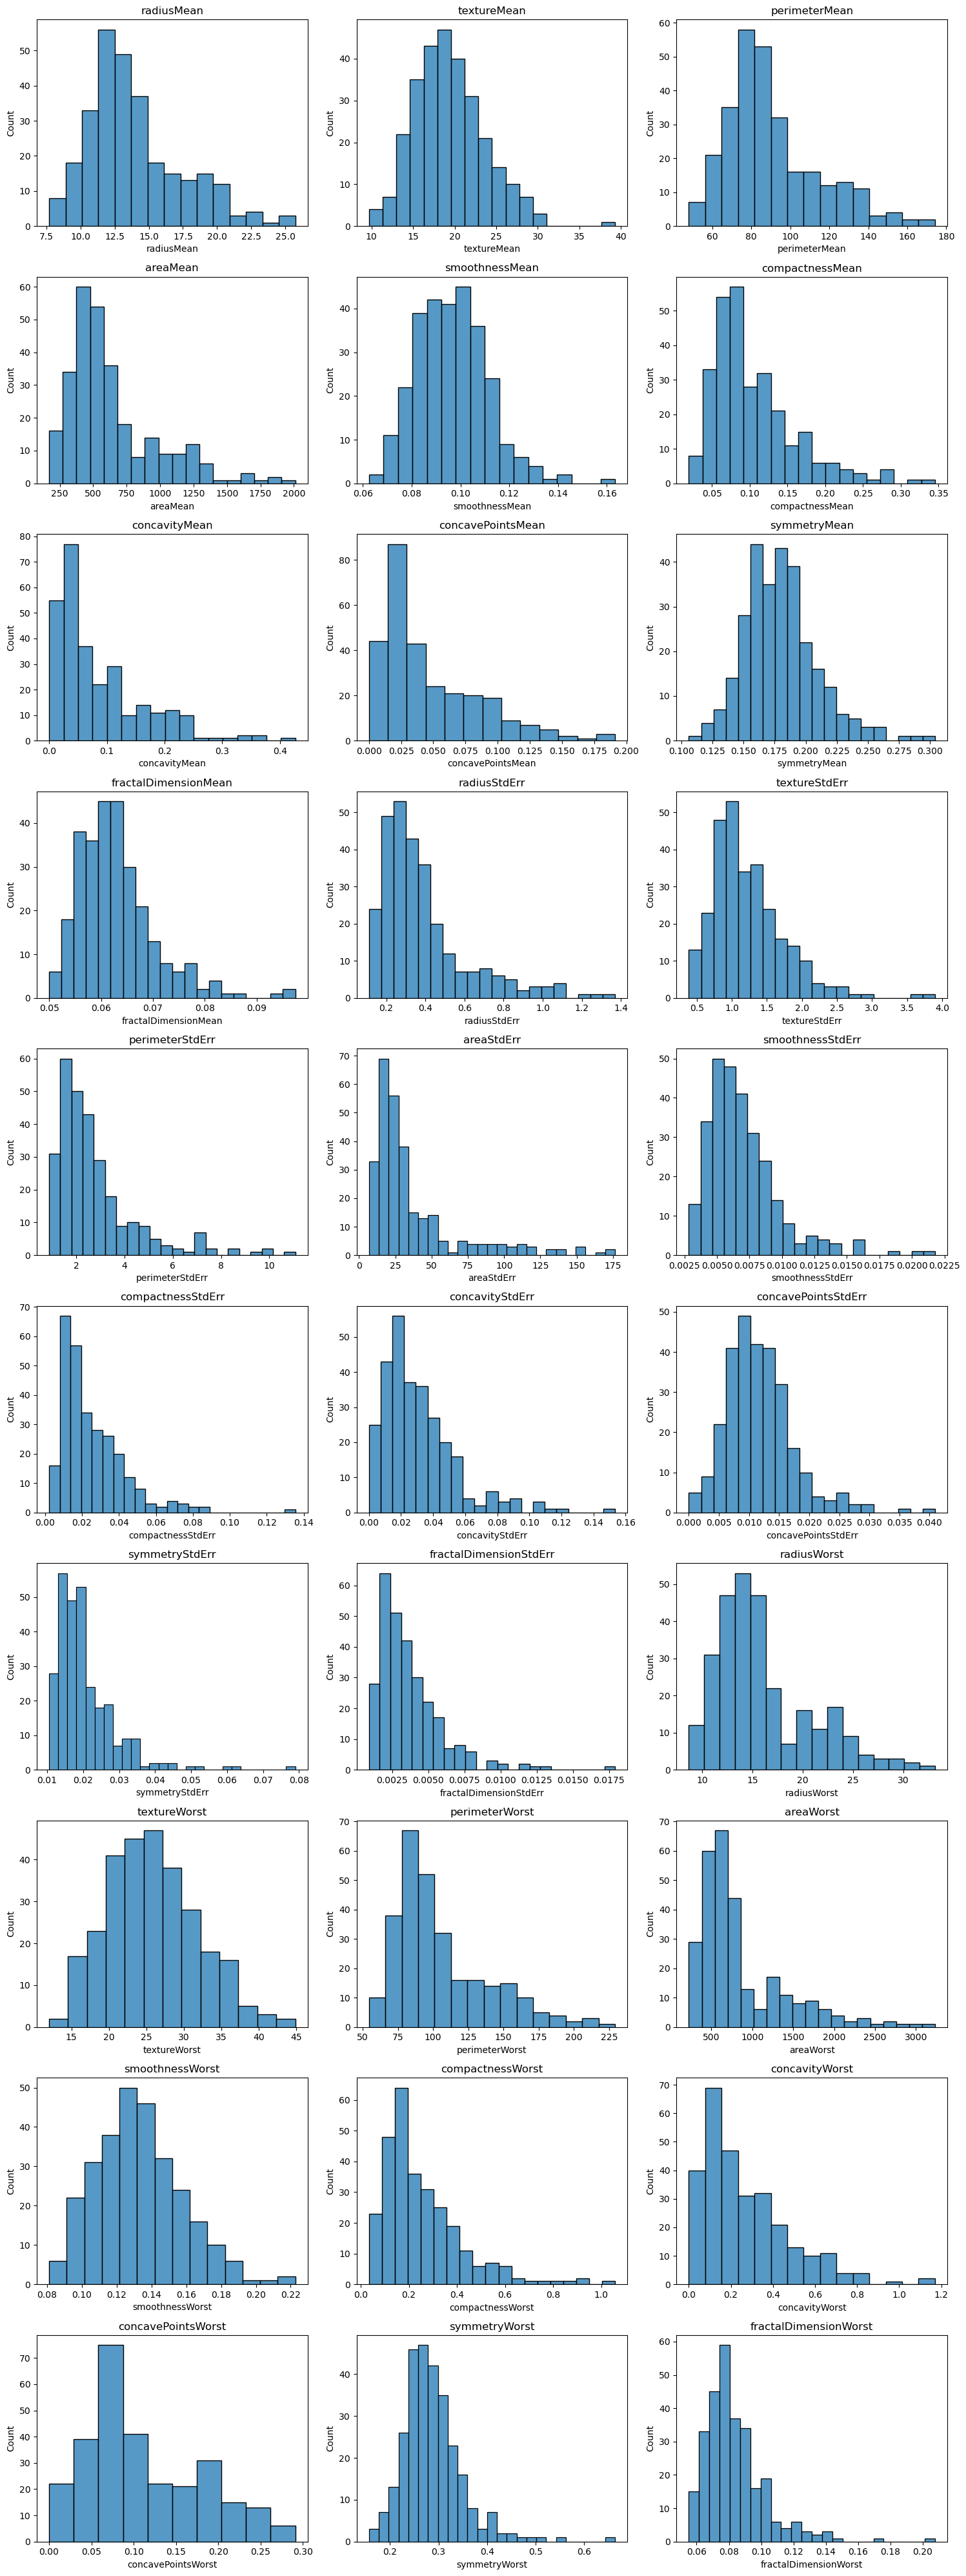

In [390]:
# there are outliers, but as the dataset consists only of 285 row, we will not remove them

numeric_columns = df_train.select_dtypes(include=[float]).columns

num_columns = 3
num_rows = (len(numeric_columns) + 1) // num_columns

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(x=df_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Overall, train dataset has 285 rows and 32 columns, while test dataset has 284 rows and 31 columns.
There are only numerical attributes with boolean target variable and no missing values. However, from the histograms it can be seen, that the dataset has several outliers. We will not remove them as the dataset has only 285 rows and it can result in the loss of valuable information, which will impact the results of analysis or modeling.

### Target variable

The class to predict is binary. Target variable takes boolean values ​​of True (there is a cancer) or False (there is no cancer).

In [391]:
df_train['class'].value_counts()

class
False    188
True      97
Name: count, dtype: int64

Data has an unbalanced distribution of classes (188 objects of class False and 97 objects of class True). This may affect the quality of the model, as the algorithm may be biased towards predicting the dominant class (in our case, False), resulting in high accuracy but poor ability to predict the less represented class (True).

### Checking the correlation

In [392]:
df_correlation = df_train.copy()
df_correlation = df_correlation.drop(['ID', 'class'], axis = 1)

<Axes: >

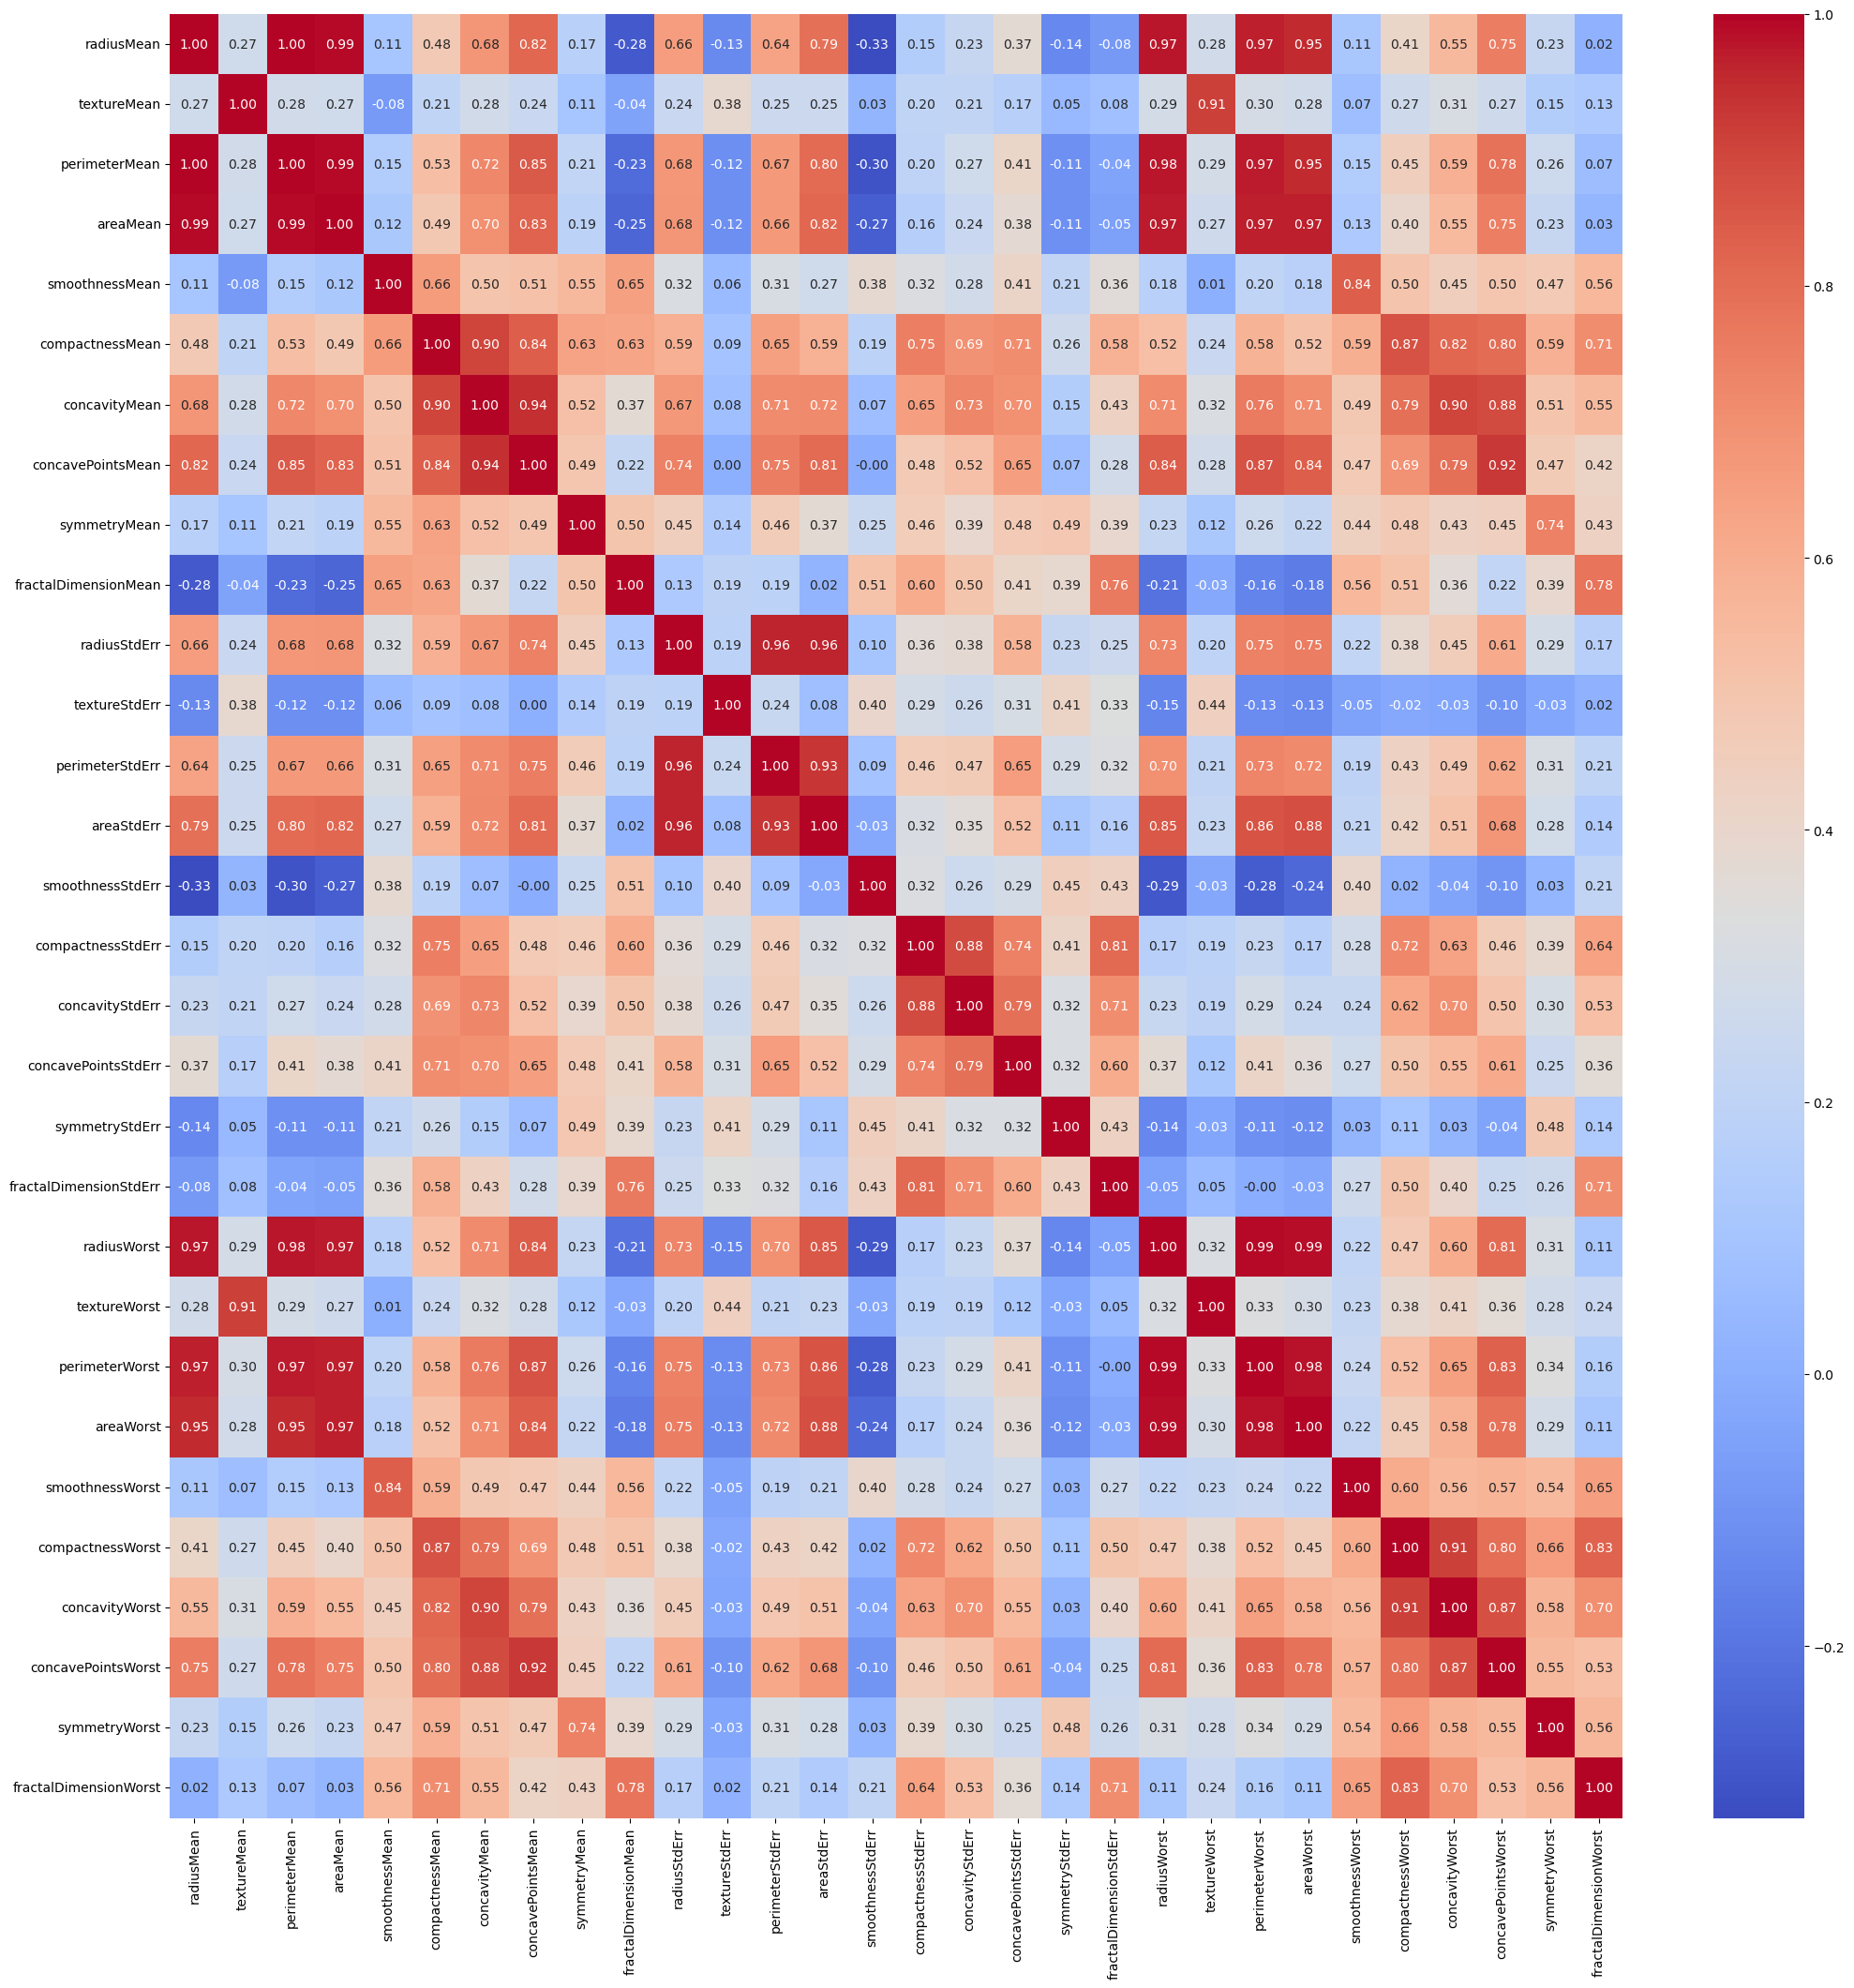

In [393]:
# from the heatmap it is seen that some variables have high correlation and we could exclude them
corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Data preprocessing

There are no missing values, but several outliers in the dataset and some highly correlated features.
However, firstly we will try to run models with the given dataset without removing or changing these data as we have only 286 samples and the data is medical data and outliers can be useful as high values ​​of a feature may indicate serious abnormalities (tumor, disease). 

After we will try to handle these features to see how it affects models.

In [394]:
df_train.columns

Index(['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean',
       'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst',
       'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [395]:
# drop target column from the train dataset and ID column as we don't need it for model
df_train_copy = df_train.copy()

df_train_copy = df_train_copy.drop(['class', 'ID'], axis = 1)
df_y_train = df_train['class']

X_test = df_test.copy()
X_test = X_test.drop(['ID'], axis = 1)

To avoid data leakage, we will firstly split the dataset into the train and validation sets

In [396]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train_copy, df_y_train, test_size=0.3)

As we are going to use classifiers which a sensitive to scale, we use StandartScaler

In [397]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns

X_validation_scaled = pd.DataFrame(scaler.transform(X_validation), columns=X_validation.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns = X_test.columns

Check the results before and after normalization

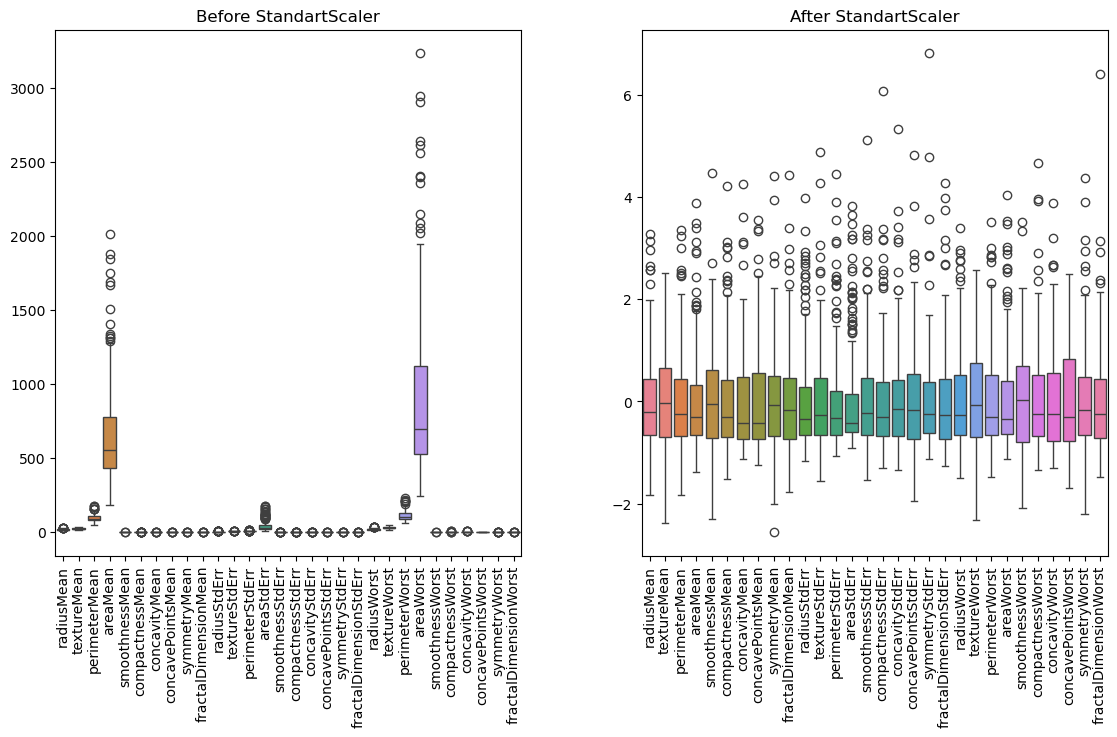

In [398]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Before StandartScaler")

sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("After StandartScaler")
plt.tight_layout()

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

### Logistic Regression 
Simple and interpretable model, works well on small datasets

### Cross validation with disbalanced data

In [399]:
log_reg = LogisticRegression()

In [400]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [401]:
y_pred_log_reg = cross_val_predict(log_reg, X_train_scaled, y_train, cv=50)

In [402]:
# Metrics to check the effectiveness of model
accuracy_log_reg = accuracy_score(y_train, y_pred_log_reg)
precision_log_reg = precision_score(y_train, y_pred_log_reg)
recall_log_reg = recall_score(y_train, y_pred_log_reg)
f1_log_reg = f1_score(y_train, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_train, y_pred_log_reg)

print('Accuracy Score:', accuracy_log_reg)
print('Precision Score:', precision_log_reg)
print('Recall:', recall_log_reg)
print('f1_score:', f1_log_reg)
confusion_log_reg

Accuracy Score: 0.9849246231155779
Precision Score: 1.0
Recall: 0.9594594594594594
f1_score: 0.9793103448275862


array([[125,   0],
       [  3,  71]])

In [403]:
metrics_results = []

metrics_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_log_reg,
    'Precision': precision_log_reg,
    'Recall': recall_log_reg,
    'F1 Score': f1_log_reg
})

### Cross validation with balanced data

As there exists data disbalance, we can try to handle it and look for the results

In [404]:
#data balancing
sm= SMOTE()

In [405]:
sm_x_train,sm_y_train = sm.fit_resample(X_train_scaled, y_train)

In [406]:
sm_y_train.value_counts()

class
False    125
True     125
Name: count, dtype: int64

Running log reg model once again

In [407]:
log_reg.fit(sm_x_train, sm_y_train)
y_pred_log_reg_sm = cross_val_predict(log_reg, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_log_reg_sm = accuracy_score(sm_y_train, y_pred_log_reg_sm)
precision_log_reg_sm = precision_score(sm_y_train, y_pred_log_reg_sm)
recall_log_reg_sm = recall_score(sm_y_train, y_pred_log_reg_sm)
f1_log_reg_sm = f1_score(sm_y_train, y_pred_log_reg_sm)
confusion_log_reg_sm = confusion_matrix(sm_y_train, y_pred_log_reg_sm)

print('Accuracy Score:', accuracy_log_reg_sm)
print('Precision Score:', precision_log_reg_sm)
print('Recall:', recall_log_reg_sm)
print('f1_score:', f1_log_reg_sm)
confusion_log_reg_sm

metrics_results.append({
    'Model': 'Logistic Regression (SM)',
    'Accuracy': accuracy_log_reg_sm,
    'Precision': precision_log_reg_sm,
    'Recall': recall_log_reg_sm,
    'F1 Score': f1_log_reg_sm
})

Accuracy Score: 0.984
Precision Score: 1.0
Recall: 0.968
f1_score: 0.983739837398374


We could see much better results!

#### Holdout results for Logistic regression for balanced data

We have already tried cross-validation and now are going to compare it to holdout

In [408]:
log_reg_holdout = LogisticRegression()
log_reg_holdout.fit(sm_x_train, sm_y_train)
y_pred_holdout = log_reg_holdout.predict(X_validation_scaled)

accuracy_holdout = accuracy_score(y_validation, y_pred_holdout)
precision_holdout = precision_score(y_validation, y_pred_holdout)
recall_holdout = recall_score(y_validation, y_pred_holdout)
f1_holdout = f1_score(y_validation, y_pred_holdout)
confusion_holdout = confusion_matrix(y_validation, y_pred_holdout)

print('Accuracy Score:', accuracy_holdout)
print('Precision Score:', precision_holdout)
print('Recall:', recall_holdout)
print('f1_score:', f1_holdout)
confusion_holdout

metrics_results.append({
    'Model': 'Logistic Regression (Holdout)',
    'Accuracy': accuracy_holdout,
    'Precision': precision_holdout,
    'Recall': recall_holdout,
    'F1 Score': f1_holdout
})

Accuracy Score: 0.9883720930232558
Precision Score: 0.9583333333333334
Recall: 1.0
f1_score: 0.9787234042553191


#### Learning curve

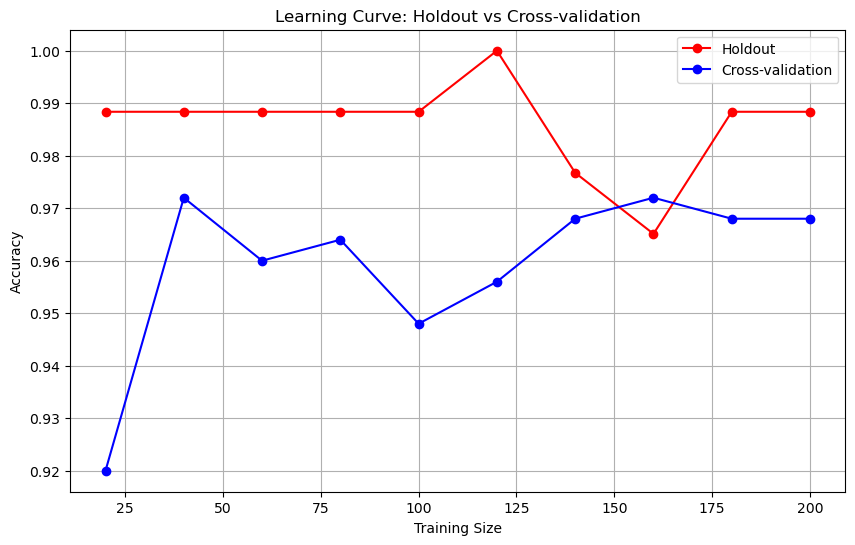

In [409]:
log_reg1 = LogisticRegression()

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, valid_scores = learning_curve(
    log_reg1, sm_x_train, sm_y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

holdout_scores = []
for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(sm_x_train, sm_y_train, train_size=size, random_state=42)
    log_reg1.fit(X_train_partial, y_train_partial)
    y_pred = log_reg1.predict(X_validation_scaled)
    holdout_scores.append(accuracy_score(y_validation, y_pred))

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, holdout_scores, label='Holdout', color='red', marker='o')

plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation', color='blue', marker='o')

plt.title('Learning Curve: Holdout vs Cross-validation')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Decision Tree classifier

### Cross validation with unbalanced data

In [410]:
dt_classifier = DecisionTreeClassifier()

In [411]:
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [412]:
y_pred_dt = cross_val_predict(dt_classifier, X_train_scaled, y_train, cv=50)

In [413]:
# Metrics to check the effectiveness of model
accuracy_dt = accuracy_score(y_train, y_pred_dt)
precision_dt = precision_score(y_train, y_pred_dt)
recall_dt = recall_score(y_train, y_pred_dt)
f1_dt = f1_score(y_train, y_pred_dt)
confusion_dt = confusion_matrix(y_train, y_pred_dt)

print('Accuracy Score:', accuracy_dt)
print('Precision Score:', precision_dt)
print('Recall:', recall_dt)
print('f1_score:', f1_dt)
confusion_dt

metrics_results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt
})

Accuracy Score: 0.8844221105527639
Precision Score: 0.84
Recall: 0.8513513513513513
f1_score: 0.8456375838926175


Results are not so good as with logistic regression.
Try to use balanced data which leads to better results, but still not so good.

### Cross validation with balanced data

In [414]:
dt_classifier.fit(sm_x_train, sm_y_train)
y_pred_dt_sm = cross_val_predict(dt_classifier, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of model
accuracy_dt_sm = accuracy_score(sm_y_train, y_pred_dt_sm)
precision_dt_sm = precision_score(sm_y_train, y_pred_dt_sm)
recall_dt_sm = recall_score(sm_y_train, y_pred_dt_sm)
f1_dt_sm = f1_score(sm_y_train, y_pred_dt_sm)
confusion_dt_sm = confusion_matrix(sm_y_train, y_pred_dt_sm)

print('Accuracy Score:', accuracy_dt_sm)
print('Precision Score:', precision_dt_sm)
print('Recall:', recall_dt_sm)
print('f1_score:', f1_dt_sm)
confusion_dt_sm

metrics_results.append({
    'Model': 'Decision Tree (SM)',
    'Accuracy': accuracy_dt_sm,
    'Precision': precision_dt_sm,
    'Recall': recall_dt_sm,
    'F1 Score': f1_dt_sm
})

Accuracy Score: 0.924
Precision Score: 0.9140625
Recall: 0.936
f1_score: 0.924901185770751


### Holdout with balanced data

In [415]:
dt_holdout = DecisionTreeClassifier()
dt_holdout.fit(sm_x_train, sm_y_train)
y_pred_dt_holdout = dt_holdout.predict(X_validation_scaled)

# Metrics to check the effectiveness of model
accuracy_dt_holdout = accuracy_score(y_validation, y_pred_dt_holdout)
precision_dt_holdout = precision_score(y_validation, y_pred_dt_holdout)
recall_dt_holdout = recall_score(y_validation, y_pred_dt_holdout)
f1_dt_holdout = f1_score(y_validation, y_pred_dt_holdout)
confusion_dt_holdout = confusion_matrix(y_validation, y_pred_dt_holdout)

print('Accuracy Score:', accuracy_dt_holdout)
print('Precision Score:', precision_dt_holdout)
print('Recall:', recall_dt_holdout)
print('f1_score:', f1_dt_holdout)
confusion_dt_holdout

metrics_results.append({
    'Model': 'Decision Tree (Holdout)',
    'Accuracy': accuracy_dt_holdout,
    'Precision': precision_dt_holdout,
    'Recall': recall_dt_holdout,
    'F1 Score': f1_dt_holdout
})

Accuracy Score: 0.9418604651162791
Precision Score: 0.9090909090909091
Recall: 0.8695652173913043
f1_score: 0.888888888888889


#### Learning curve for Decision tree classifier

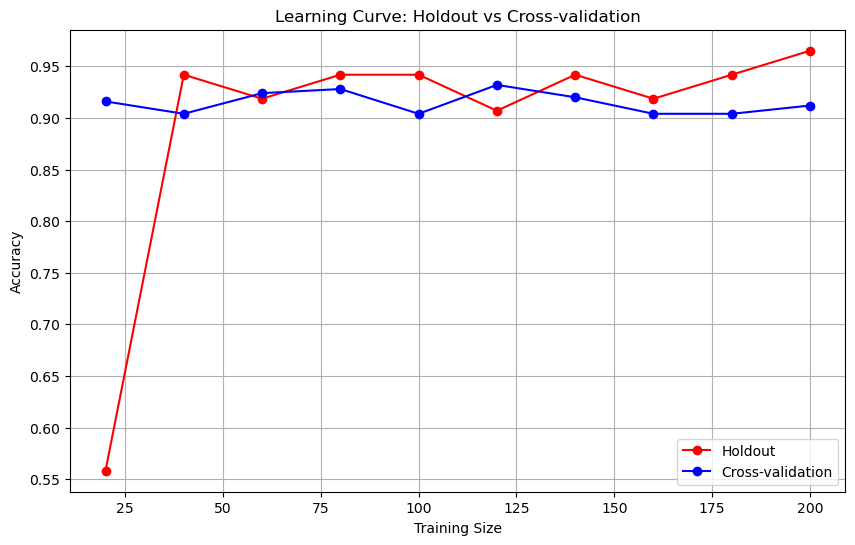

In [416]:
dt = DecisionTreeClassifier()

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, valid_scores = learning_curve(
    dt, sm_x_train, sm_y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

holdout_scores = []
for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(sm_x_train, sm_y_train, train_size=size, random_state=42)
    dt.fit(X_train_partial, y_train_partial)
    y_pred = dt.predict(X_validation_scaled)
    holdout_scores.append(accuracy_score(y_validation, y_pred))

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, holdout_scores, label='Holdout', color='red', marker='o')

plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation', color='blue', marker='o')

plt.title('Learning Curve: Holdout vs Cross-validation')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### KNN Classifier

### Cross validation with unbalanced data

In [417]:
knn = KNeighborsClassifier(n_neighbors=3)

In [418]:
knn.fit(X_train_scaled, y_train)

y_pred_knn = cross_val_predict(knn, X_train_scaled, y_train, cv=50)

# Metrics to check the effectiveness of the model
accuracy_knn = accuracy_score(y_train, y_pred_knn)
precision_knn = precision_score(y_train, y_pred_knn)
recall_knn = recall_score(y_train, y_pred_knn)
f1_knn = f1_score(y_train, y_pred_knn)
confusion_knn = confusion_matrix(y_train, y_pred_knn)

print('Accuracy Score:', accuracy_knn)
print('Precision Score:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_knn)
confusion_knn

metrics_results.append({
    'Model': 'KNN',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
})

Accuracy Score: 0.9547738693467337
Precision Score: 0.9577464788732394
Recall: 0.918918918918919
F1 Score: 0.9379310344827587


### Cross validation with balanced data

In [419]:
knn.fit(sm_x_train, sm_y_train)

y_pred_knn_sm = cross_val_predict(knn, sm_x_train, sm_y_train, cv=50)

# Metrics to check the effectiveness of the model
accuracy_knn_sm = accuracy_score(sm_y_train, y_pred_knn_sm)
precision_knn_sm = precision_score(sm_y_train, y_pred_knn_sm)
recall_knn_sm = recall_score(sm_y_train, y_pred_knn_sm)
f1_knn_sm = f1_score(sm_y_train, y_pred_knn_sm)
confusion_knn_sm = confusion_matrix(sm_y_train, y_pred_knn_sm)

print('Accuracy Score:', accuracy_knn_sm)
print('Precision Score:', precision_knn_sm)
print('Recall:', recall_knn_sm)
print('F1 Score:', f1_knn_sm)
confusion_knn_sm

metrics_results.append({
    'Model': 'KNN (SM)',
    'Accuracy': accuracy_knn_sm,
    'Precision': precision_knn_sm,
    'Recall': recall_knn_sm,
    'F1 Score': f1_knn_sm
})

Accuracy Score: 0.96
Precision Score: 0.96
Recall: 0.96
F1 Score: 0.96


### Holdout with balanced data

In [420]:
knn_holdout = KNeighborsClassifier(n_neighbors=3)

knn_holdout.fit(sm_x_train, sm_y_train)
y_pred_knn_holdout = knn_holdout.predict(X_validation_scaled)

# Metrics to check the effectiveness of model
accuracy_knn_holdout = accuracy_score(y_validation, y_pred_knn_holdout)
precision_knn_holdout = precision_score(y_validation, y_pred_knn_holdout)
recall_knn_holdout = recall_score(y_validation, y_pred_knn_holdout)
f1_knn_holdout = f1_score(y_validation, y_pred_knn_holdout)
confusion_knn_holdout = confusion_matrix(y_validation, y_pred_knn_holdout)

print('Accuracy Score:', accuracy_knn_holdout)
print('Precision Score:', precision_knn_holdout)
print('Recall:', recall_knn_holdout)
print('f1_score:', f1_knn_holdout)
confusion_knn_holdout

metrics_results.append({
    'Model': 'KNN (Holdout)',
    'Accuracy': accuracy_knn_holdout,
    'Precision': precision_knn_holdout,
    'Recall': recall_knn_holdout,
    'F1 Score': f1_knn_holdout
})

Accuracy Score: 0.9651162790697675
Precision Score: 0.9166666666666666
Recall: 0.9565217391304348
f1_score: 0.9361702127659574


#### Learning curve for KNN

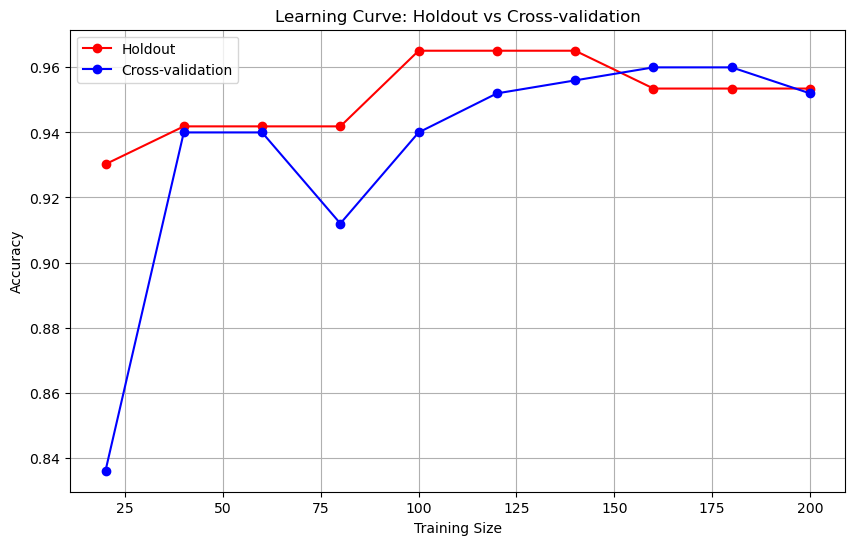

In [421]:
knn = KNeighborsClassifier(n_neighbors=3)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, valid_scores = learning_curve(
    knn, sm_x_train, sm_y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

holdout_scores = []
for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(sm_x_train, sm_y_train, train_size=size, random_state=42)
    knn.fit(X_train_partial, y_train_partial)
    y_pred = knn.predict(X_validation_scaled)
    holdout_scores.append(accuracy_score(y_validation, y_pred))

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, holdout_scores, label='Holdout', color='red', marker='o')

plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation', color='blue', marker='o')

plt.title('Learning Curve: Holdout vs Cross-validation')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Predictions with test dataset

In [422]:
# Logistic regression
test_prediction_log_reg = log_reg.predict(X_test_scaled)
predictions_log_reg = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_log_reg})
predictions_log_reg.to_csv("Log_reg_predictions.csv", index = False)

print(predictions_log_reg)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [423]:
# Decision tree
test_prediction_dt = dt_classifier.predict(X_test_scaled)
predictions_dt = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_dt})
predictions_dt.to_csv("DT_predictions.csv", index = False)

print(predictions_dt)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [424]:
# Logistic regression holdout
y_pred_holdout = log_reg_holdout.predict(X_test_scaled)
predictions_log_reg_holdout = pd.DataFrame({'ID': df_test['ID'], 'class': y_pred_holdout})
predictions_log_reg_holdout.to_csv("Log_reg_holdout_predictions.csv", index = False)

print(predictions_log_reg_holdout)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


# Additional preprocessing

As high correlation can lead to multicollinearity, which negatively affects the interpretability of the model, we drop the columns, where correlation is more than 0,9:
radius mean,texture mean, perimeter mean, area mean ,concave points mean, radius se, area se, perimeter worst, areaworst

<Axes: >

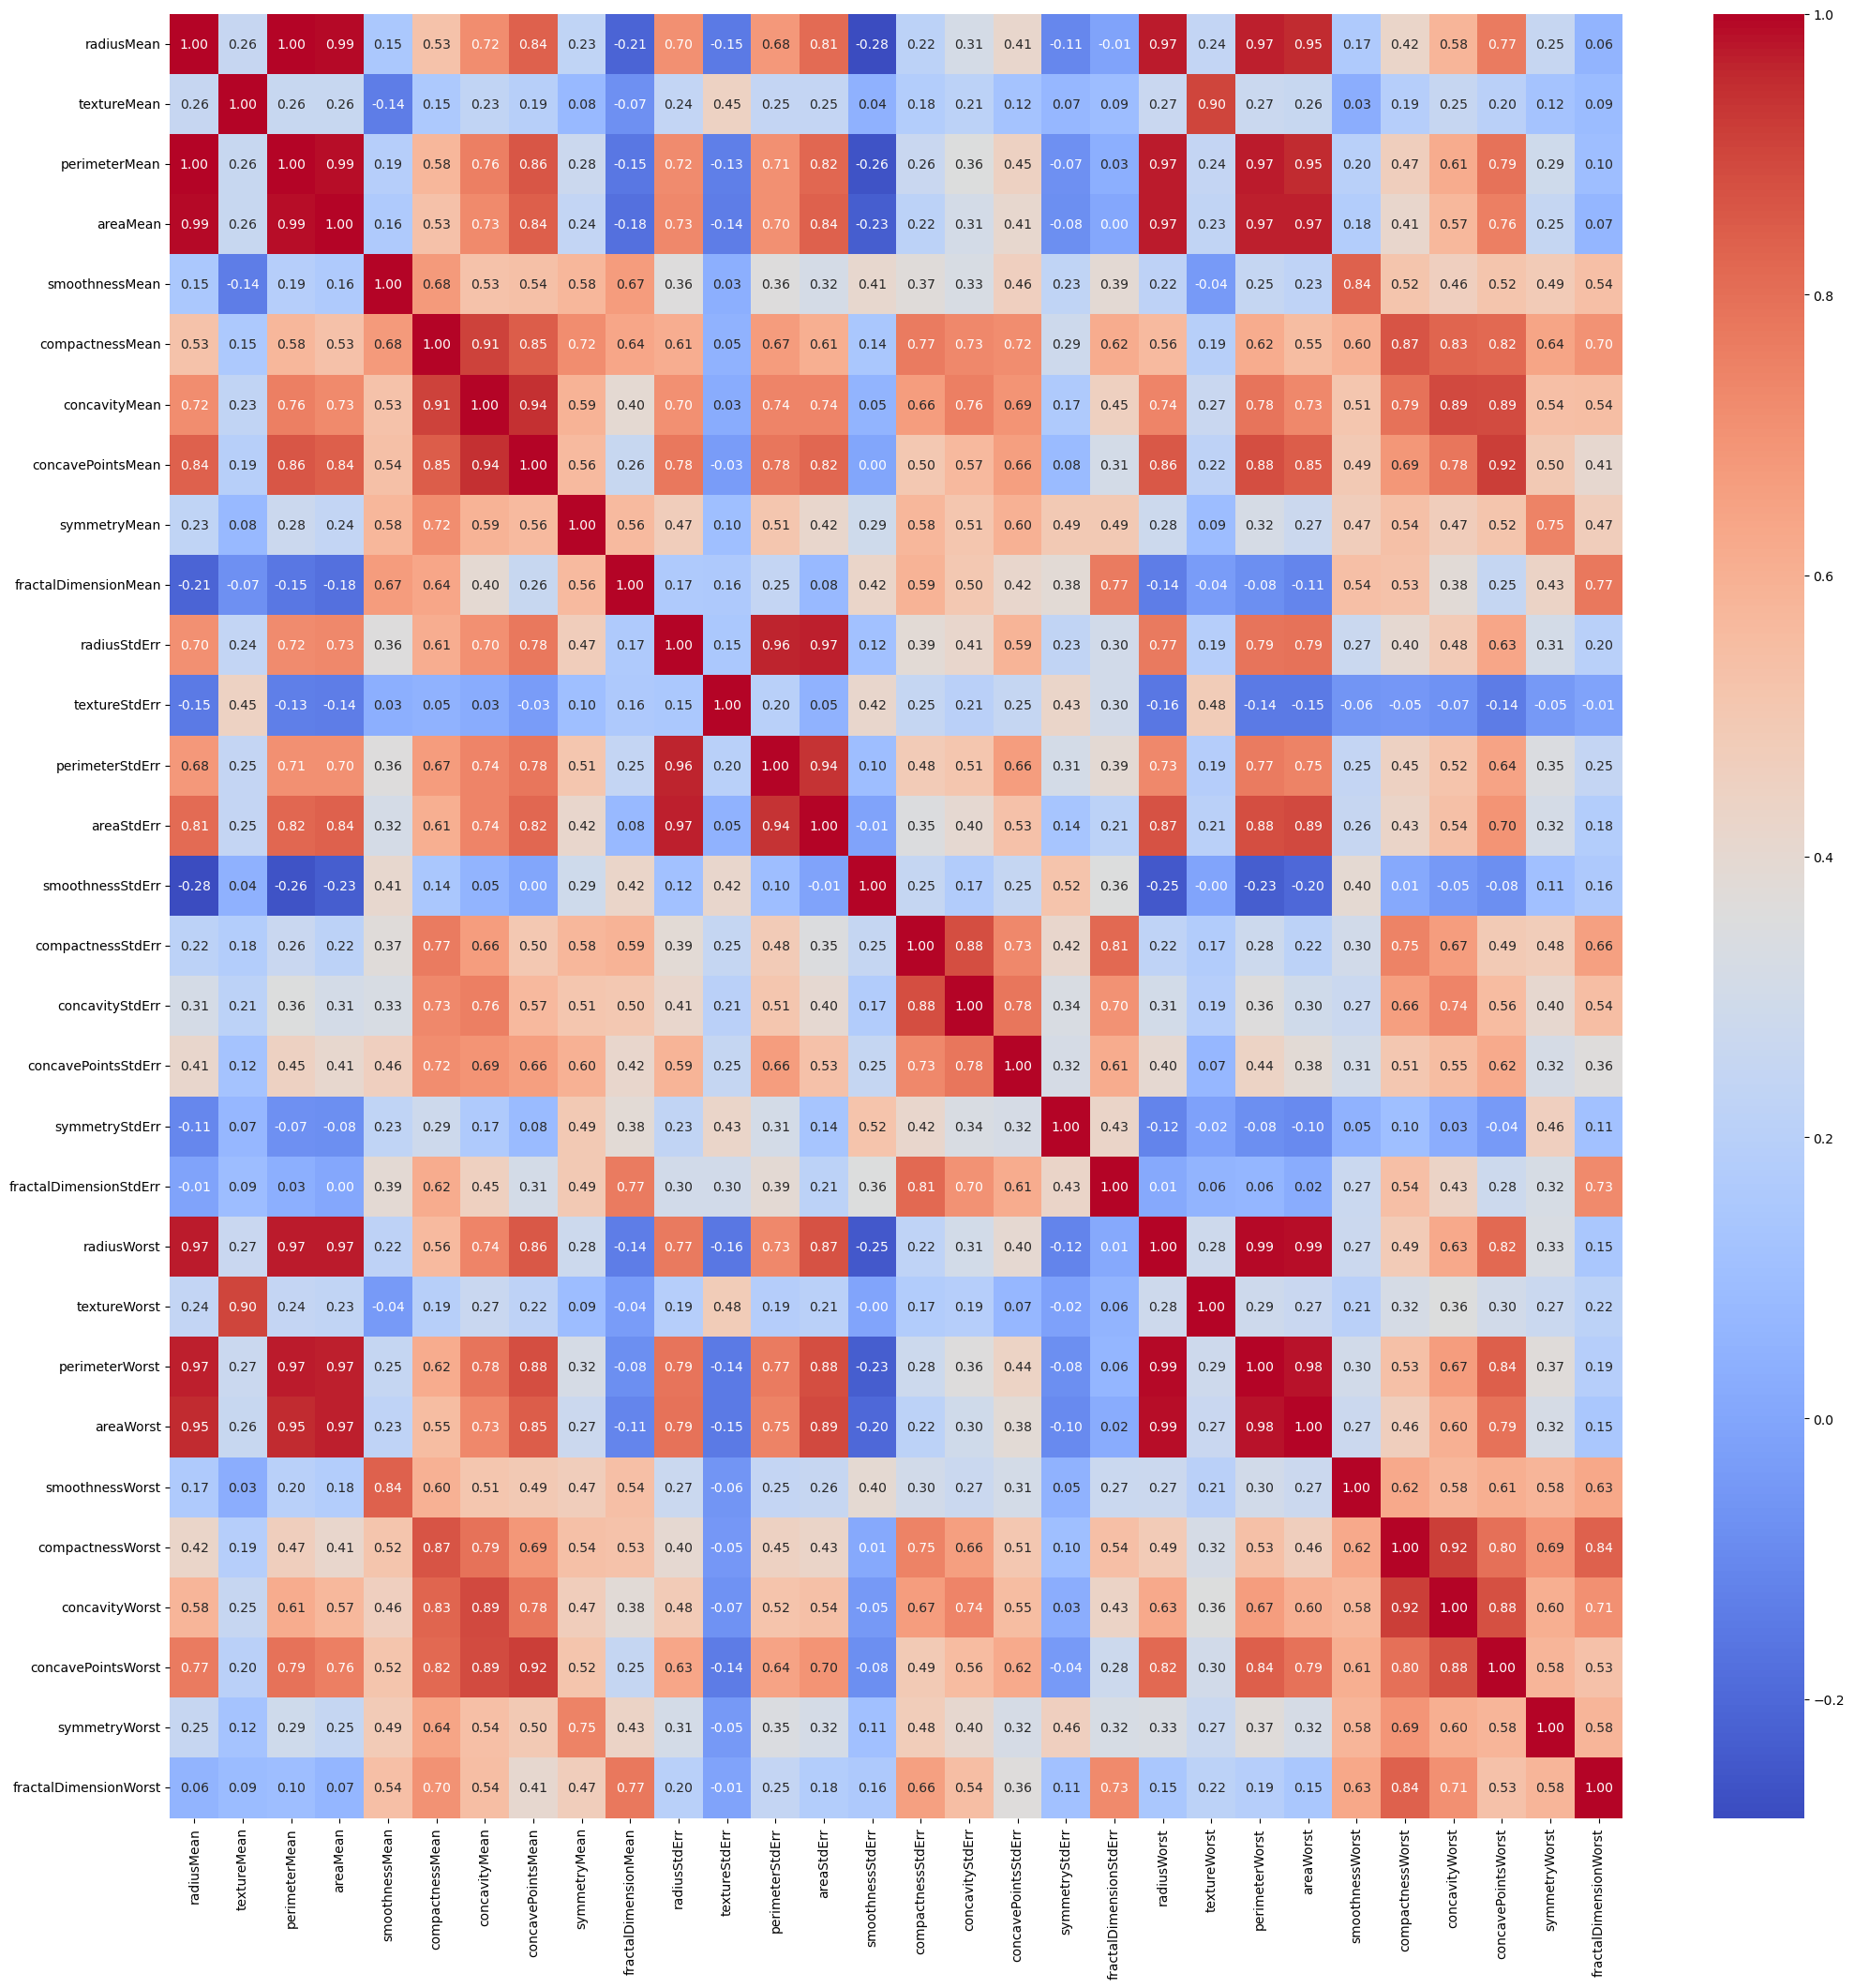

In [425]:
# from the heatmap it is seen that some variables have high correlation and we could exclude them
df_correlation = X_train_scaled.copy()

corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [426]:
# Remove highly correlated features with >0.96

threshold = 0.96

drop_columns = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            drop_columns.add(colname)
print(f"Highly correlated features: {drop_columns}")

Highly correlated features: {'perimeterStdErr', 'perimeterWorst', 'areaMean', 'perimeterMean', 'areaWorst', 'radiusWorst', 'areaStdErr'}


In [427]:
X_train_scaled_upd = X_train_scaled.copy()
X_train_scaled_upd = X_train_scaled_upd.drop(['perimeterStdErr', 'perimeterWorst', 'areaMean', 'perimeterMean', 'areaWorst', 'radiusWorst'], axis = 1)
X_train_scaled_upd.columns

Index(['radiusMean', 'textureMean', 'smoothnessMean', 'compactnessMean',
       'concavityMean', 'concavePointsMean', 'symmetryMean',
       'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'textureWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [428]:
X_validation_scaled_upd = X_validation_scaled.copy()
X_validation_scaled_upd = X_validation_scaled_upd.drop(['perimeterStdErr', 'perimeterWorst', 'areaMean', 'perimeterMean', 'areaWorst', 'radiusWorst'], axis = 1)
X_validation_scaled_upd.columns

Index(['radiusMean', 'textureMean', 'smoothnessMean', 'compactnessMean',
       'concavityMean', 'concavePointsMean', 'symmetryMean',
       'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'textureWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [429]:
X_test_scaled_upd = X_test_scaled.copy()
X_test_scaled_upd = X_test_scaled_upd.drop(['perimeterStdErr', 'perimeterWorst', 'areaMean', 'perimeterMean', 'areaWorst', 'radiusWorst'], axis=1)
X_test_scaled_upd.columns

Index(['radiusMean', 'textureMean', 'smoothnessMean', 'compactnessMean',
       'concavityMean', 'concavePointsMean', 'symmetryMean',
       'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'areaStdErr',
       'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr',
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'textureWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object')

In [430]:
sm_x_upd, sm_y_upd = sm.fit_resample(X_train_scaled_upd, y_train)

In [441]:
log_reg2 = LogisticRegression()
log_reg2.fit(sm_x_upd, sm_y_upd)
y_pred_log_reg2 = cross_val_predict(log_reg2, sm_x_upd, sm_y_upd, cv=50)

# Metrics to check the effectiveness of model
accuracy_log_reg2 = accuracy_score(sm_y_upd, y_pred_log_reg2)
precision_log_reg2 = precision_score(sm_y_upd, y_pred_log_reg2)
recall_log_reg2 = recall_score(sm_y_upd, y_pred_log_reg2)
f1_log_reg2 = f1_score(sm_y_upd, y_pred_log_reg2)
confusion_log_reg2 = confusion_matrix(sm_y_upd, y_pred_log_reg2)

print('Accuracy Score:', accuracy_log_reg2)
print('Precision Score:', precision_log_reg2)
print('Recall:', recall_log_reg2)
print('f1_score:', f1_log_reg2)
confusion_log_reg2

metrics_results.append({
    'Model': 'Logistic Regression 2 (CV + Preprocessing)',
    'Accuracy': accuracy_log_reg2,
    'Precision': precision_log_reg2,
    'Recall': recall_log_reg2,
    'F1 Score': f1_log_reg2
})

Accuracy Score: 0.98
Precision Score: 0.9918032786885246
Recall: 0.968
f1_score: 0.9797570850202428


In [432]:
# Logistic regression upd
test_prediction_log_reg2 = log_reg2.predict(X_test_scaled_upd)
predictions_log_reg2 = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_log_reg2})
predictions_log_reg2.to_csv("Log_reg2_predictions.csv", index = False)

print(predictions_log_reg2)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [440]:
log_reg_holdout1 = LogisticRegression()
log_reg_holdout1.fit(sm_x_upd, sm_y_upd)

y_pred_holdout1 = log_reg_holdout1.predict(X_validation_scaled_upd)

accuracy_holdout1 = accuracy_score(y_validation, y_pred_holdout1)
precision_holdout1 = precision_score(y_validation, y_pred_holdout1)
recall_holdout1 = recall_score(y_validation, y_pred_holdout1)
f1_holdout1 = f1_score(y_validation, y_pred_holdout1)
confusion_holdout1 = confusion_matrix(y_validation, y_pred_holdout1)

print('Accuracy Score:', accuracy_holdout1)
print('Precision Score:', precision_holdout1)
print('Recall:', recall_holdout1)
print('f1_score:', f1_holdout1)
confusion_holdout1

metrics_results.append({
    'Model': 'Logistic Regression (Holdout+Preprocessing)',
    'Accuracy': accuracy_holdout1,
    'Precision': precision_holdout1,
    'Recall': recall_holdout1,
    'F1 Score': f1_holdout1
})

Accuracy Score: 0.9883720930232558
Precision Score: 0.9583333333333334
Recall: 1.0
f1_score: 0.9787234042553191


In [434]:
# Logistic regression holdout upd
test_prediction_holdout1 = log_reg_holdout1.predict(X_test_scaled_upd)
predictions_holdout1 = pd.DataFrame({'ID': df_test['ID'], 'class': test_prediction_holdout1})
predictions_holdout1.to_csv("Log_reg_holdout1_predictions.csv", index = False)

print(predictions_holdout1)

            ID  class
0      9012568  False
1       844981   True
2      8813129  False
3    881094802  False
4     88350402  False
..         ...    ...
279    9010598  False
280     862485  False
281    8910506  False
282    8812877   True
283     911202  False

[284 rows x 2 columns]


In [435]:
svc.fit(sm_x_upd, sm_y_upd)
y_pred_svc_sm1 = cross_val_predict(svc, sm_x_upd, sm_y_upd, cv=50)

# Metrics to check the effectiveness of model
accuracy_svc_sm1 = accuracy_score(sm_y_upd, y_pred_svc_sm1)
precision_svc_sm1 = precision_score(sm_y_upd, y_pred_svc_sm1)
recall_svc_sm1 = recall_score(sm_y_upd, y_pred_svc_sm1)
f1_svc_sm1 = f1_score(sm_y_upd, y_pred_svc_sm1)
roc_auc_svc_sm1 = roc_auc_score(sm_y_upd, y_pred_svc_sm1)
confusion_svc_sm1 = confusion_matrix(sm_y_upd, y_pred_svc_sm1)

print('Accuracy Score:', accuracy_svc_sm1)
print('Precision Score:', precision_svc_sm1)
print('Recall:', recall_svc_sm1)
print('f1_score:', f1_svc_sm1)
print('roc_auc:', roc_auc_svc_sm1)
confusion_svc_sm1

Accuracy Score: 0.98
Precision Score: 0.9918032786885246
Recall: 0.968
f1_score: 0.9797570850202428
roc_auc: 0.98


array([[124,   1],
       [  4, 121]])

### Execution time

In [436]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC()
}

results = {}

for name, clf in classifiers.items():
    #  holdout
    start_time = time.time()
    clf.fit(X_train_holdout, y_train_holdout)
    y_pred = clf.predict(X_validation_holdout)
    holdout_time = time.time() - start_time
    
    #  cross-validation
    start_time = time.time()
    cv_scores = cross_val_score(clf, sm_x_train, sm_y_train, cv=5)
    cv_time = time.time() - start_time

    results[name] = {
        'Holdout Time': holdout_time,
        'CV Time': cv_time
    }
for name, result in results.items():
    print(f"{name}:")
    print(f"  Holdout Time: {result['Holdout Time']:.4f} seconds")
    print(f"  CV Time: {result['CV Time']:.4f} seconds")
    print("-" * 50)

Logistic Regression:
  Holdout Time: 0.0090 seconds
  CV Time: 0.0425 seconds
--------------------------------------------------
Random Forest:
  Holdout Time: 0.1540 seconds
  CV Time: 0.7601 seconds
--------------------------------------------------
SVC:
  Holdout Time: 0.0049 seconds
  CV Time: 0.0320 seconds
--------------------------------------------------


In [442]:
metrics_df = pd.DataFrame(metrics_results)

print(metrics_df)

                                          Model  Accuracy  Precision  \
0                           Logistic Regression  0.984925   1.000000   
1                      Logistic Regression (SM)  0.984000   1.000000   
2                 Logistic Regression (Holdout)  0.988372   0.958333   
3                                 Decision Tree  0.884422   0.840000   
4                            Decision Tree (SM)  0.924000   0.914062   
5                       Decision Tree (Holdout)  0.941860   0.909091   
6                                           KNN  0.954774   0.957746   
7                                      KNN (SM)  0.960000   0.960000   
8                                 KNN (Holdout)  0.965116   0.916667   
9   Logistic Regression (Holdout+Preprocessing)  0.988372   0.958333   
10   Logistic Regression 2 (CV + Preprocessing)  0.980000   0.991803   

      Recall  F1 Score  
0   0.959459  0.979310  
1   0.968000  0.983740  
2   1.000000  0.978723  
3   0.851351  0.845638  
4   0.9360